## Import Libraries 📦

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Load Dataset 🗂️

In [2]:
#Load Dataset
df = pd.read_csv('world-data-2023.csv')

## Data Type Conversion 🔄

In [3]:
# Data Type Conversion:
# Columns to convert to float
columns_to_convert = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
                      'Birth Rate', 'Co2-Emissions', 'Forested Area (%)',
                      'CPI', 'CPI Change (%)', 'Fertility Rate', 'Gasoline Price', 'GDP',
                      'Gross primary education enrollment (%)', 'Armed Forces size',
                      'Gross tertiary education enrollment (%)', 'Infant mortality',
                      'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 
                      'Out of pocket health expenditure', 'Physicians per thousand', 
                      'Population', 'Population: Labor force participation (%)', 
                      'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']
df[columns_to_convert] = df[columns_to_convert].applymap(lambda x: float(str(x).replace(',', '').replace('$', '').replace('%', '')))


## Handling missing values 🧮

In [4]:
columns_with_missing = df.columns[df.isnull().any()]
columns_with_missing

Index(['Abbreviation', 'Agricultural Land( %)', 'Land Area(Km2)',
       'Armed Forces size', 'Birth Rate', 'Calling Code', 'Capital/Major City',
       'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Currency-Code',
       'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 'GDP',
       'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [5]:
# Impute numerical columns with mean
numerical_columns = df.select_dtypes(include=['float64'])
numerical_columns 

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,60.0,58.1,652230.0,323000.0,32.49,93.0,8672.0,149.90,2.3,4.47,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,105.0,43.1,28748.0,9000.0,11.78,355.0,4536.0,119.05,1.4,1.62,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,18.0,17.4,2381741.0,317000.0,24.28,213.0,150006.0,151.36,2.0,3.02,...,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,164.0,40.0,468.0,NaN,7.20,376.0,469.0,NaN,NaN,1.27,...,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
4,26.0,47.5,1246700.0,117000.0,40.73,244.0,34693.0,261.73,17.1,5.52,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,32.0,24.5,912050.0,343000.0,17.88,58.0,164175.0,2740.27,254.9,2.27,...,45.8,1.92,28515829.0,59.7,NaN,73.3,8.80,25162368.0,6.423750,-66.589730
191,314.0,39.3,331210.0,522000.0,16.75,84.0,192668.0,163.52,2.8,2.05,...,43.5,0.82,96462106.0,77.4,19.1,37.6,2.01,35332140.0,14.058324,108.277199
192,56.0,44.6,527968.0,40000.0,30.45,967.0,10609.0,157.58,8.1,3.79,...,81.0,0.31,29161922.0,38.0,NaN,26.6,12.91,10869523.0,15.552727,48.516388
193,25.0,32.1,752618.0,16000.0,36.19,260.0,5141.0,212.31,9.2,4.63,...,27.5,1.19,17861030.0,74.6,16.2,15.6,11.43,7871713.0,-13.133897,27.849332


In [6]:
# Impute numerical columns with mean
numerical_columns = numerical_columns.columns[numerical_columns.isnull().any()]
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [7]:
# Impute categorical columns with mode
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns = categorical_columns.columns[categorical_columns.isnull().any()]
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode())

In [8]:
# Verify if all missing values are handled
missing_counts = df.isnull().sum()
print(missing_counts)

Country                                       0
Density\n(P/Km2)                              0
Abbreviation                                  0
Agricultural Land( %)                         0
Land Area(Km2)                                0
Armed Forces size                             0
Birth Rate                                    0
Calling Code                                  0
Capital/Major City                            0
Co2-Emissions                                 0
CPI                                           0
CPI Change (%)                                0
Currency-Code                                15
Fertility Rate                                0
Forested Area (%)                             0
Gasoline Price                                0
GDP                                           0
Gross primary education enrollment (%)        0
Gross tertiary education enrollment (%)       0
Infant mortality                              0
Largest city                            

In [9]:
# Impute categorical columns with mode
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns = categorical_columns.columns[categorical_columns.isnull().any()]
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [10]:
# Verify if all missing values are handled
missing_counts = df.isnull().sum()
print(missing_counts)

Country                                      0
Density\n(P/Km2)                             0
Abbreviation                                 0
Agricultural Land( %)                        0
Land Area(Km2)                               0
Armed Forces size                            0
Birth Rate                                   0
Calling Code                                 0
Capital/Major City                           0
Co2-Emissions                                0
CPI                                          0
CPI Change (%)                               0
Currency-Code                                0
Fertility Rate                               0
Forested Area (%)                            0
Gasoline Price                               0
GDP                                          0
Gross primary education enrollment (%)       0
Gross tertiary education enrollment (%)      0
Infant mortality                             0
Largest city                                 0
Life expectan

## DATA VISUALIZATION 📊

### The plot displays the top 20 countries with the highest populations. China and India have the two highest populations

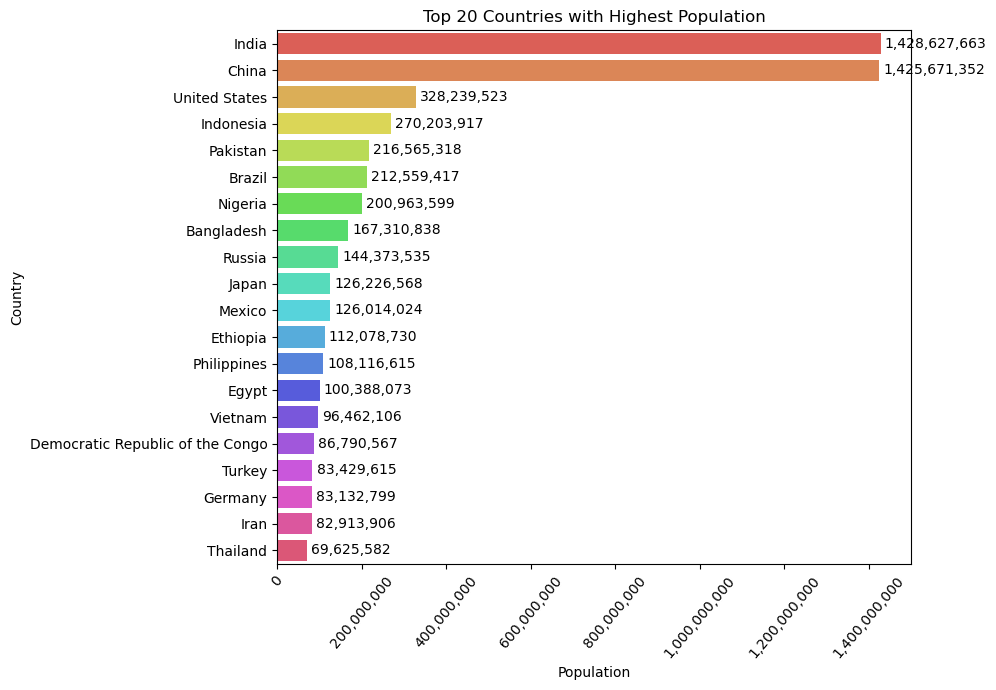

In [11]:
import matplotlib.ticker as ticker

sorted_df = df.sort_values(by='Population', ascending=False)

# Get the top 20 countries with the highest population
top_population_country = sorted_df.head(20)

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Plot for top population countries
sns.barplot(data=top_population_country, x='Population', y='Country', palette='hls', saturation=1, ax=axes)
axes.set_title('Top 20 Countries with Highest Population')
axes.set_xlabel('Population')
axes.set_ylabel('Country')
axes.set_xticklabels(['{:,}'.format(int(x)) for x in axes.get_xticks()], rotation = 50)
for p in axes.patches:
    axes.annotate(f'{int(p.get_width()):,}', (p.get_width(), p.get_y() + p.get_height() / 2),
                 xytext=(3, 0), textcoords='offset points', ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

#### Top 20 Countries with Highest Unemployment Rates: The left plot displays the countries with the highest unemployment rates. South Africa has the highest unemployment rate at 28.18%.


#### Top 20 Countries with Lowest Unemployment Rates: The right plot illustrates the countries with the lowest unemployment rates. These countries have remarkably low unemployment rates, with some even less than 1%

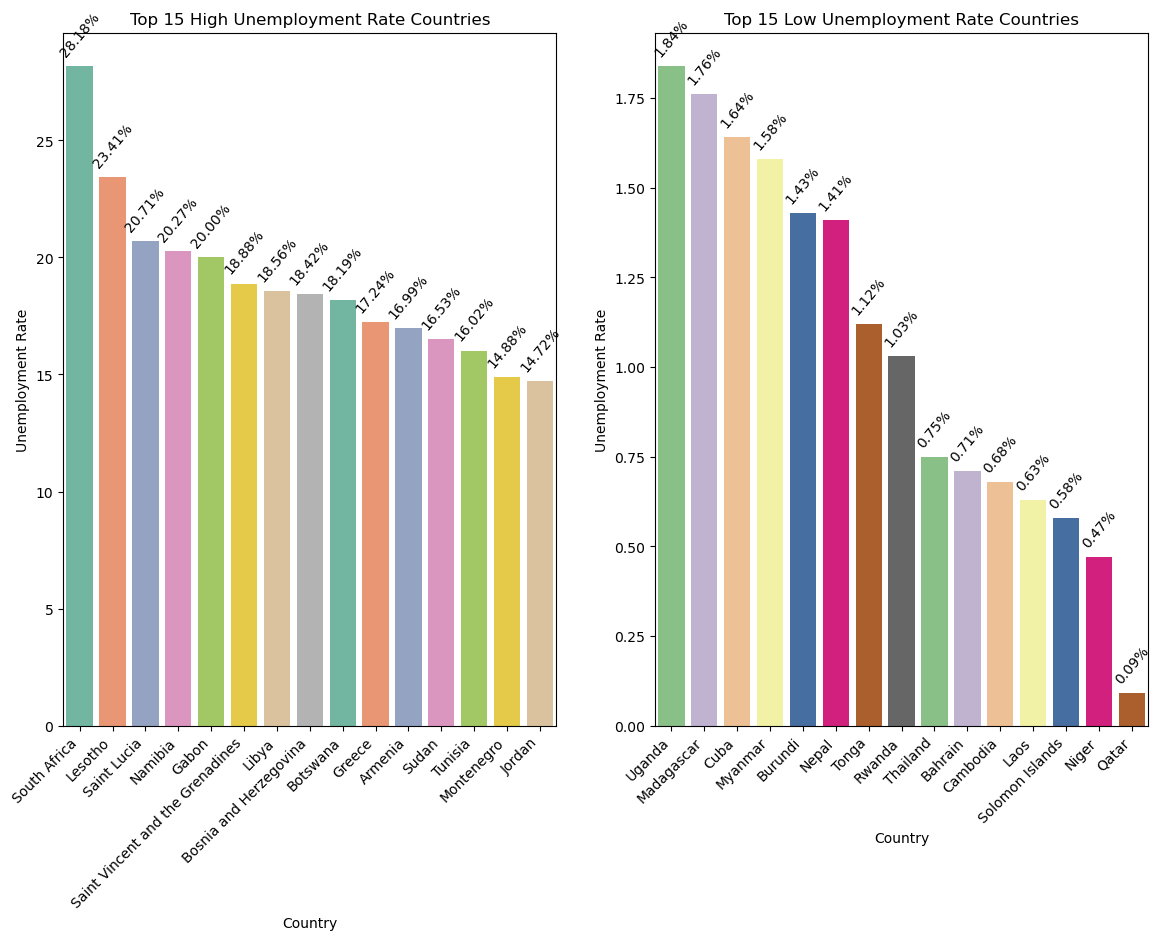

In [12]:
sorted_df = df.sort_values(by = 'Unemployment rate', ascending = False)

top_high_unemployment = sorted_df.head(15)
top_low_unemployment = sorted_df.tail(15)

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# Plot for high unemployment countries
sns.barplot(data=top_high_unemployment, x='Country', y='Unemployment rate', palette='Set2', ax=axes[0])
axes[0].set_title('Top 15 High Unemployment Rate Countries')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Unemployment Rate')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points', rotation = 50)

# Plot for low unemployment countries
sns.barplot(data=top_low_unemployment, x='Country', y='Unemployment rate', palette='Accent', ax=axes[1])
axes[1].set_title('Top 15 Low Unemployment Rate Countries')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Unemployment Rate')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points', rotation = 50)

# Show the plots
plt.show()


#### This visualization highlights the top 15 countries with the highest birth rates. 

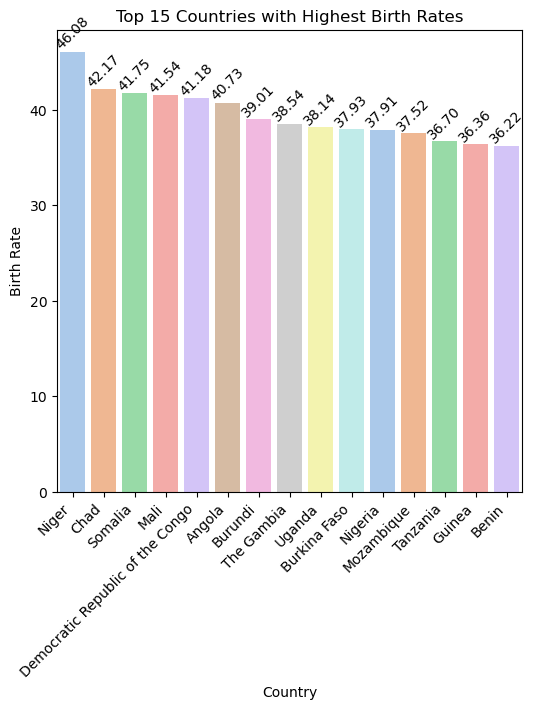

In [13]:
# Sort the dataframe by 'Birth Rate' column in descending order
sorted_df = df.sort_values(by='Birth Rate', ascending=False)

# Get the top 15 countries with the highest birth rates
top_country_birth = sorted_df.head(15)

# Create a bar plot to visualize the top 20 countries with high birth rates
plt.figure(figsize=(6, 6))
sns.barplot(data=top_country_birth, x='Country', y='Birth Rate', palette='pastel')

# Add title and labels
plt.title('Top 15 Countries with Highest Birth Rates')
plt.xlabel('Country')
plt.ylabel('Birth Rate')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display data labels on top of each bar
for index, value in enumerate(top_country_birth['Birth Rate']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10, rotation = 45)

# Show the plot
plt.show()


### The graph shows the sizes of the armies in the top 20 countries. India has the biggest army, followed by China, Russia, United States and pakistan.

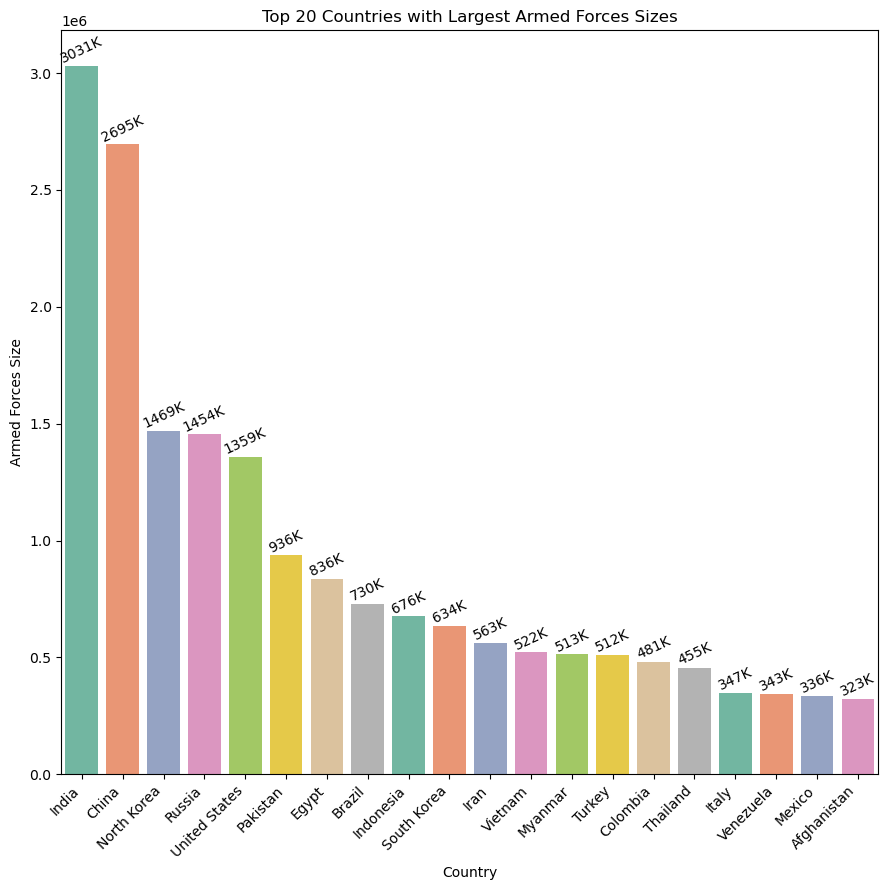

In [14]:
# Sort the DataFrame by 'Armed Forces size' column in descending order
sorted_df = df.sort_values(by='Armed Forces size', ascending=False)

# Get the top 15 countries with the largest armed forces sizes
top10 = sorted_df.head(20)

# Create a bar plot to visualize the top 20 countries with the largest armed forces sizes
plt.figure(figsize=(9, 9))
sns.barplot(data=top10, x='Country', y='Armed Forces size', palette='Set2')

# Add title and labels
plt.title('Top 20 Countries with Largest Armed Forces Sizes')
plt.xlabel('Country')
plt.ylabel('Armed Forces Size')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(top10['Armed Forces size']):
    value_in_thousands = value / 1000
    # Annotate the bars with values in thousands
    plt.text(index, value, f'{value_in_thousands:.0f}K', ha='center', va='bottom', fontsize=10, rotation=25)

# Show the plot
plt.tight_layout()
plt.show()


### The visualization showcases the land area distribution of the top 20 countries, highlighting Russia as the leader with the largest land area, followed by Canada, the United States, and China.

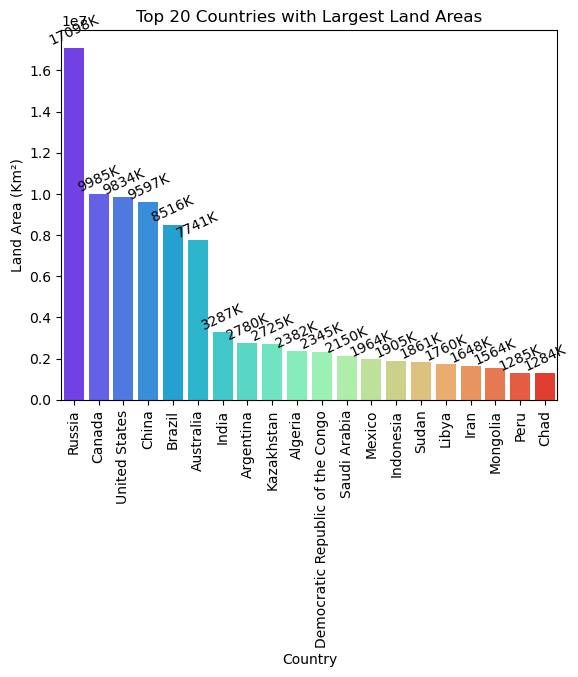

In [15]:

sorted_df = df.sort_values(by='Land Area(Km2)', ascending=False)
top_land_area_countries = sorted_df.head(20)
top_land_vs_population_countries = sorted_df.head(20)
# Create subplots for both bar plot and scatter plot

# Bar plot of top countries with largest land areas
sns.barplot(data=top_land_area_countries, x='Country', y='Land Area(Km2)', palette='rainbow')
plt.title('Top 20 Countries with Largest Land Areas')
plt.xlabel('Country')
plt.ylabel('Land Area (Km²)')
plt.xticks(rotation = 90)
for index, value in enumerate(top_land_area_countries['Land Area(Km2)']):
    value_in_thousands = value / 1000
    # Annotate the bars with values in thousands
    plt.text(index, value, f'{value_in_thousands:.0f}K', ha='center', va='bottom', fontsize=10, rotation=25)

# Show the plots

plt.show()


### China has the highest CO2 emissions, followed by the United States and India.

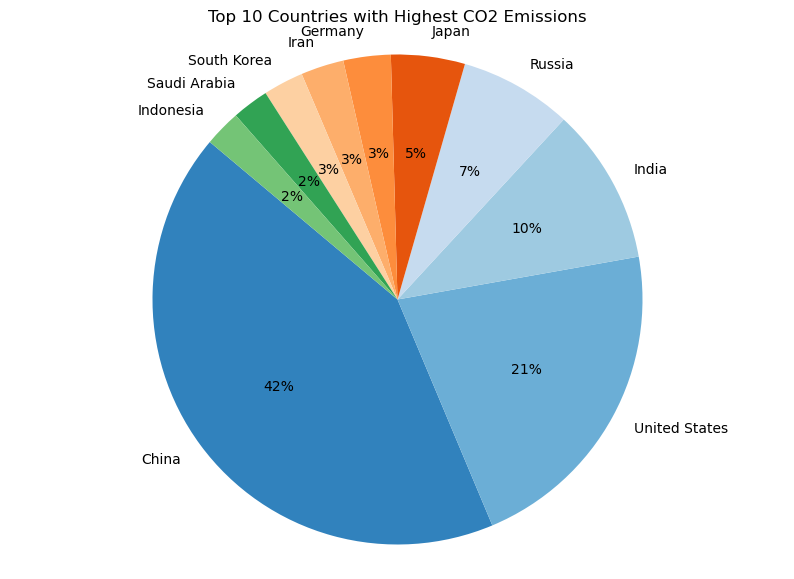

In [16]:
top_co2_emissions_countries = df.sort_values(by='Co2-Emissions', ascending=False).head(10)

# Create a pie chart to visualize CO2 emissions for top countries
plt.figure(figsize=(10,7))
plt.pie(top_co2_emissions_countries['Co2-Emissions'], 
        labels=top_co2_emissions_countries['Country'], autopct='%1.0f%%',
        startangle=140, colors=plt.get_cmap('tab20c').colors)
plt.title('Top 10 Countries with Highest CO2 Emissions')
plt.axis('equal')
plt.show()


### High infant mortality rates (50.6 to 80.0 per 1000 live births) reveal healthcare disparities among the top 10 countries. Urgent action and international collaboration are needed to improve conditions and reduce these rates.

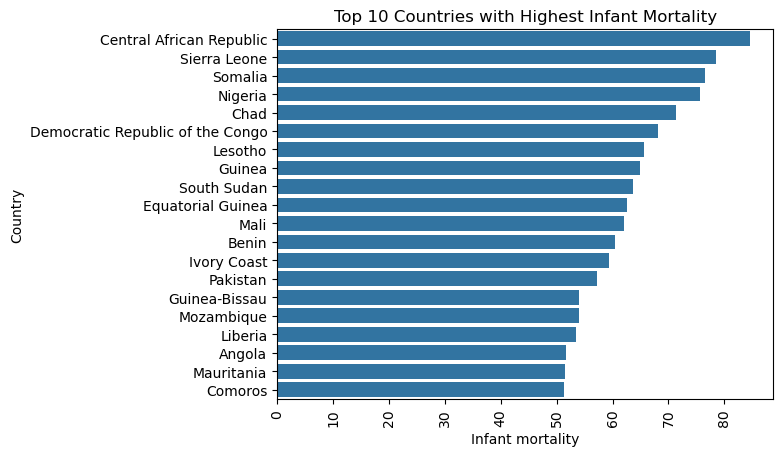

In [17]:
top_infant_mortality = df.sort_values(by='Infant mortality', ascending=False).head(20)
sns.barplot(x='Infant mortality', y='Country', data=top_infant_mortality)
plt.title('Top 10 Countries with Highest Infant Mortality')
plt.xticks(rotation=90)
plt.show()

### The United States leads with the highest GDP, followed by China, Germany, and the United Kingdom, showcasing their significant economic strength. The graph offers a clear comparison of GDP values among these countries.

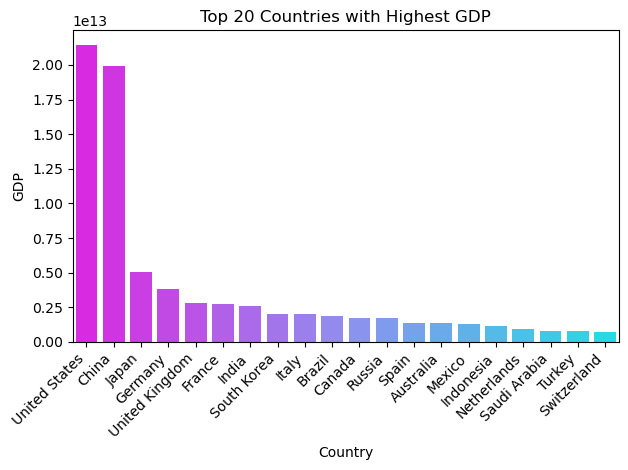

In [18]:
top_gdp_countries = df.sort_values(by='GDP', ascending=False).head(20)

# Create a bar plot to visualize GDP for top countries
sns.barplot(data=top_gdp_countries, x='Country', y='GDP', palette='cool_r')
plt.title('Top 20 Countries with Highest GDP')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### French, English, and Spanish are the most common official languages among the top 5 countries.

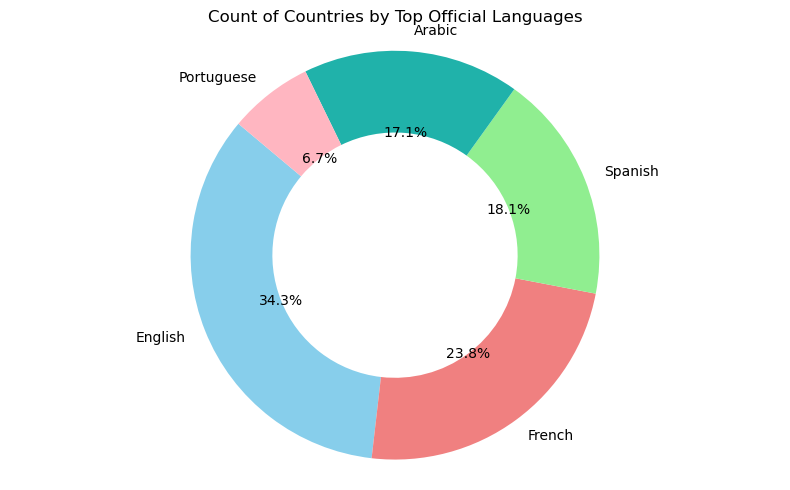

In [19]:

# Get the top N official languages
top_languages_count = 5
top_languages = df['Official language'].value_counts().nlargest(top_languages_count).index

# Filter the DataFrame to include only the top languages
df_top_languages = df[df['Official language'].isin(top_languages)]

# Count of Countries by Top Official Languages
plt.figure(figsize=(8, 5))
data = df_top_languages['Official language'].value_counts()
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightseagreen', 'lightpink']


# Create a donut chart
plt.pie(data, labels=data.index, colors=colors, autopct='%1.1f%%', wedgeprops={'width': 0.4}, startangle=140)
plt.title('Count of Countries by Top Official Languages')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.tight_layout()

plt.show()


### China, India, and the United States lead, each with urban populations exceeding hundreds of millions, while Brazil, Indonesia, and Russia follow closely in terms of urbanization.

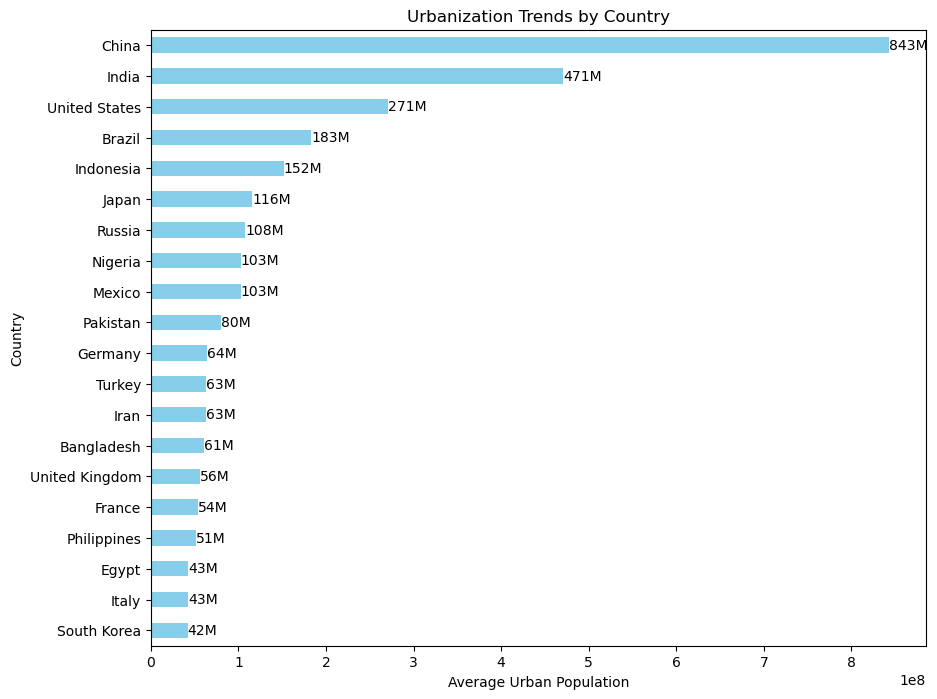

In [20]:
subset_countries = 20  # Number of top countries to display
urbanization_by_country = df.groupby('Country')['Urban_population'].mean().sort_values(ascending=False).head(subset_countries)

plt.figure(figsize=(10, 8))
ax = urbanization_by_country.plot(kind='barh', color='skyblue')
plt.title('Urbanization Trends by Country')
plt.xlabel('Average Urban Population')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top

# Add data labels to the bars
for index, value in enumerate(urbanization_by_country):
    values = value / 1000000
    ax.text(value + 2, index, f'{values:.0f}M', va='center', color='black')  # Display values on a separate axis

plt.show()


### The urban population distribution exhibits a right-skewed pattern, with a higher concentration of countries having smaller urban populations.

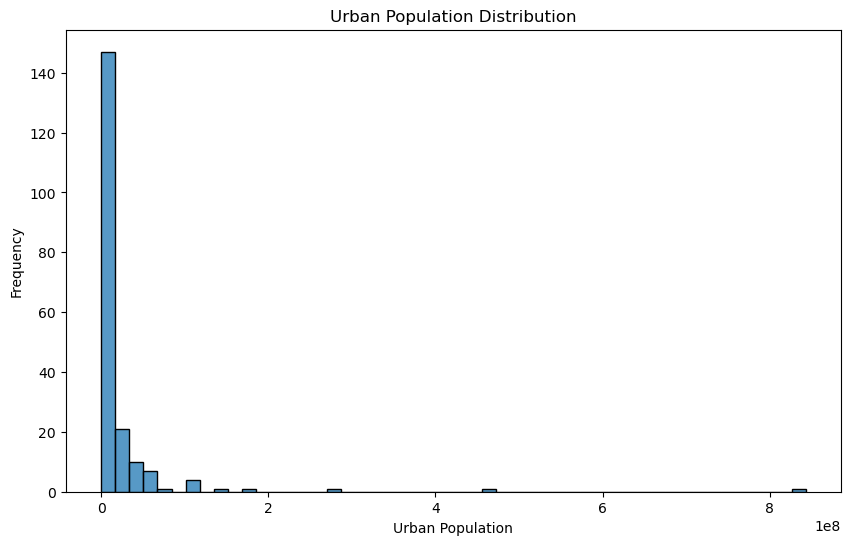

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Urban_population'], bins=50)
plt.title('Urban Population Distribution')
plt.xlabel('Urban Population')
plt.ylabel('Frequency')
plt.show()

### This indicates that a higher number of countries have relatively lower population densities, while fewer countries have higher population densities

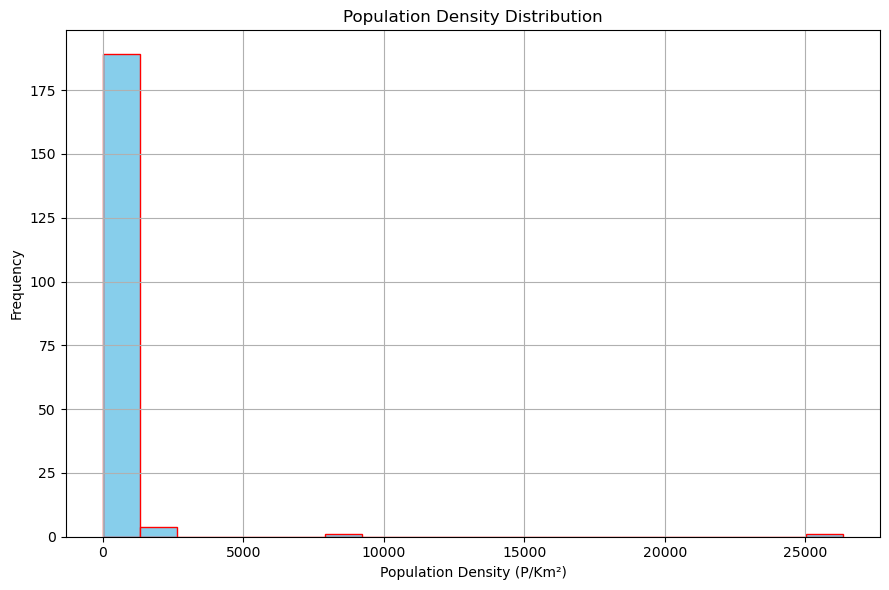

In [29]:
plt.figure(figsize=(9, 6))
plt.hist(df['Density\n(P/Km2)'], bins=20, color='skyblue', edgecolor='red')
plt.title('Population Density Distribution')
plt.xlabel('Population Density (P/Km²)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


### Lower GDPs tend to have higher birth rates

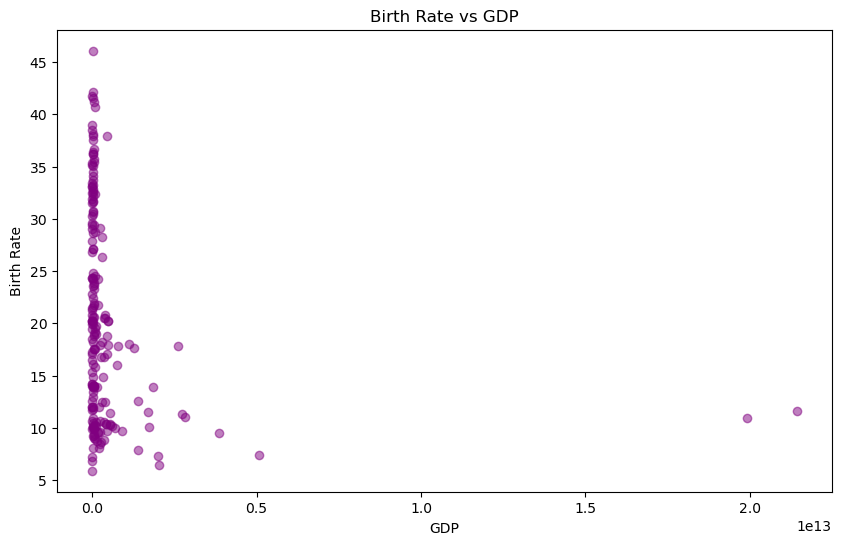

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df['GDP'], df['Birth Rate'], color='purple', alpha=0.5)
plt.title('Birth Rate vs GDP')
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()

### The distribution of life expectancy is skewed to the left, with a peak around 70-80 years. Most countries have life expectancies between 60 and 85 years.

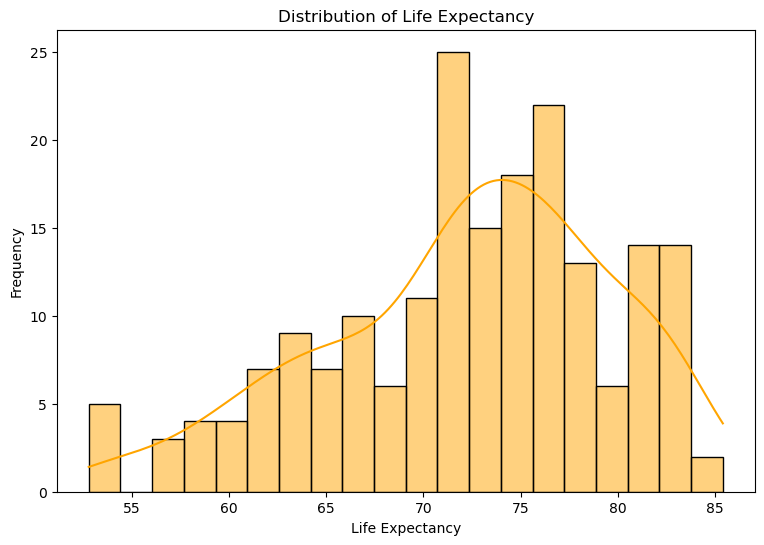

In [23]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='Life expectancy', bins=20, kde=True, color='Orange')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

### The histogram of birth rates indicates a skewed distribution, with fewer countries having higher birth rates and a larger proportion having lower birth rates.

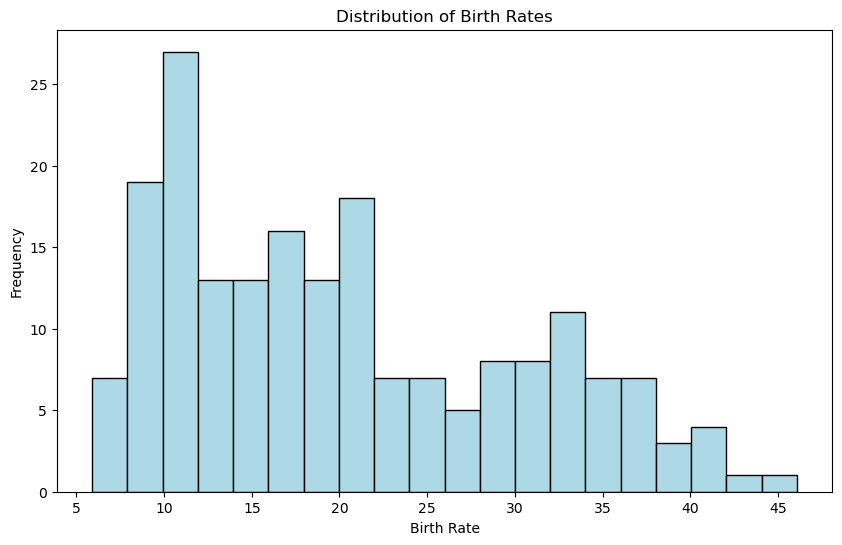

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df['Birth Rate'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Birth Rates')
plt.xlabel('Birth Rate')
plt.ylabel('Frequency')
plt.show()

In [26]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

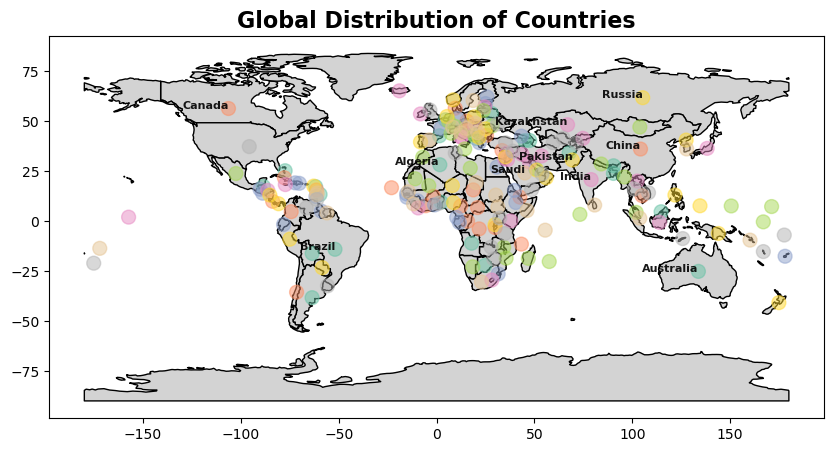

In [27]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))

# Plot world map
world.plot(ax=ax, color='lightgrey', edgecolor='black')

scatter = gdf.plot(ax=ax, markersize=100, legend=True, cmap='Set2', alpha=0.5, categorical=True, legend_kwds={'bbox_to_anchor': (1, 1)})

# Annotate country names
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Country']):
    if label in ['United States of America', 'Canada', 'Russia',
                 'China', 'Australia','Pakistan','India','Brazil', 'Kazakhstan','Algeria', 'Saudi Arabia']:
        ax.text(x, y, label.split(' ')[0], fontsize=8, ha='right', color='black', weight='bold', alpha=0.9)
    else:
        ax.text(x, y, '', fontsize=8, ha='right', color='darkslategrey', weight='bold', alpha=0.7)

# Set a title
plt.title('Global Distribution of Countries', fontsize=16, fontweight='bold')





# Display the plot
plt.show()
